In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df=pd.read_csv('Auto_Insurance_Fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
#Checking the shape of the data type
df.shape

(1000, 40)

Observation:
    
    The dataset consist of 1000 rows and 40 columns.

In [4]:
#Checking the number of columns.
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

## Checking the Missing values

In [5]:
#Checking the missing values 
df.isnull().values.any()

True

In [6]:
#Checking the number of missing values in the columns
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
#Dropping the _c39 column
df=df.drop(columns=['_c39'],axis=1)
df.shape

(1000, 39)

Here we remove _c39 column because all the values are NaN. Now again we check the null values.

In [8]:
#Again check for missing values
df.isnull().values.any()

False

Observation:

    Here we see there are no null values but there is a '?' present in our dataset which is treated as null value.

In [9]:
#Checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

Observation:

    Information of the dataset shows that there are no missing values. But in the dataset '?' is present. So I will 
    encode '?' as NaN value and the again check it. 

In [10]:
#Replacing the question mark with NaN value.
df=df.replace('?',np.NaN)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [11]:
#Checking for null values again.
df.isnull().values.any()

True

Observation:
    
    Now it tells that nan value is present. Now we check the no of null values present in particular columns. and remove it.

In [12]:
#Checking the number of null values in columns
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

Observation:

    1-There are 178 null values present in collision_type column.

    2-360 null value present in property_damage column.

    3-343 null value present in police_report_available column.
    
    4-All the three columns are object data type so we fill the missing values with mode.

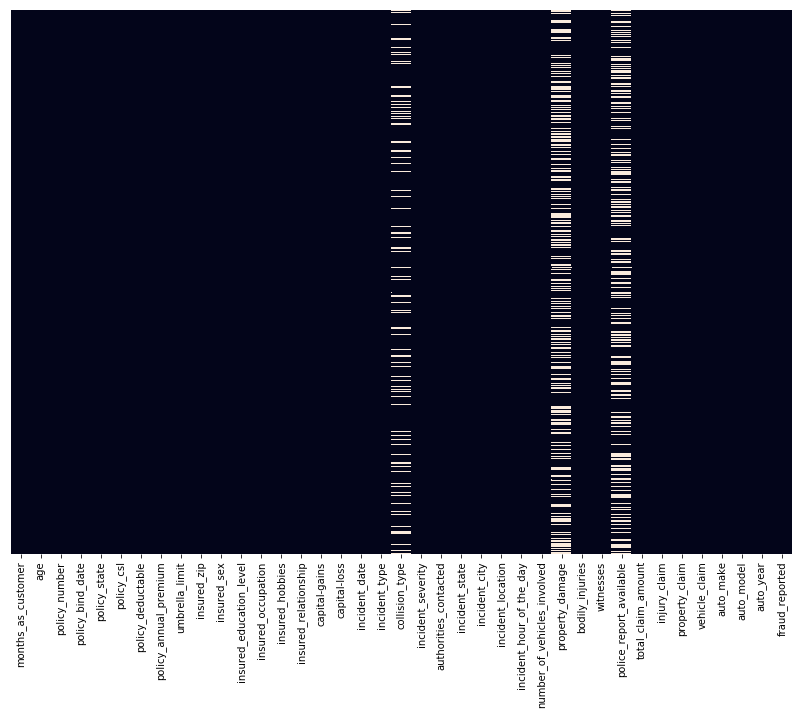

In [13]:
#Seeing the null values with the help of heat map
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [14]:
#Imputing the missing value with mode 

for col in ['collision_type', 'property_damage', 'police_report_available']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
#Now again checking for missing values.
df.isnull().values.any()

False

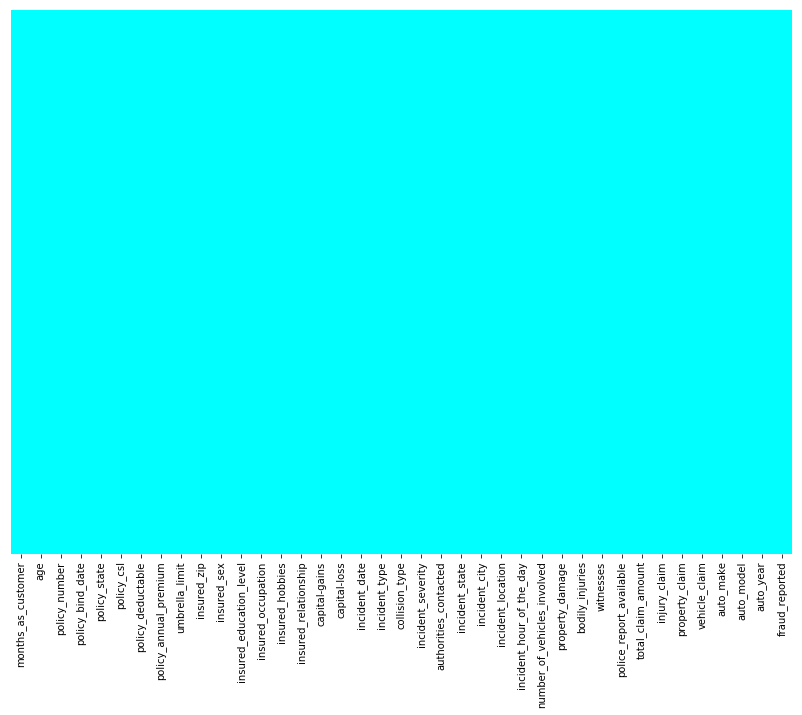

In [16]:
#Seeing the null values with the help of heat map
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cool')

Now all the null values are removed and our data is clean.

## Exploring the Categorical columns

In [17]:
#Printing the object data type columns and their unique values

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column)+ ' : ' +str(df[column].unique()))
        print(df[column].value_counts())
        print('*****************************************************************************************************')
        print('\n')

policy_bind_date : ['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-

### For Analyzing the data with target i.e. fraud_reported we have to change income into numeric type.

In [18]:
#Changing the data type of target column.

df['fraud_reported']=df['fraud_reported'].map({'N' : 0 , 'Y' : 1})
df['fraud_reported'].dtypes

dtype('int64')

In [19]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

Observation:
    
    Out of 1000 reporte 247 are reported as fraud.

# Summary Statistics

In [20]:
#Checking the summary of the dataset
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


Observation:
    
    1-Maximum month as a customer is 479.
    
    2-Maximum age is 64 and minimum is 19 years old.
    
    3-Maximum vehicles involved in accidents is four and minimum is one.
    
    4-Maximum two person get affected in accident.
    
    5-Automobiles meet with an accident is manufactured in between year 1995 to 2015.
    
    6-In months_as_customer, policy_number, policy_deductable, umbrella_limit, insured_zip, capital_gain, capital_loss,
      injury_claim, property_claim are right skewed data because mean is greater than median.
        
    7-In total_claim_amount, vehicle_claim are left skewed data because median is greater than mean.
    
    8-The difference between 75% and maximum is higher in months_as_customer, policy_annual_premium, umbrella_limit,
      capital_gain, total_claim_amount, property_claim,vehicle_claim columns. So outliers are present in these columns
      which needs to removed.

# To check the correlation

In [21]:
df_cor=df.corr()
df_cor

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316


Here we can see the correlation between the columns.

For Better understanding we can see it via visualization(with the help of heatmap).

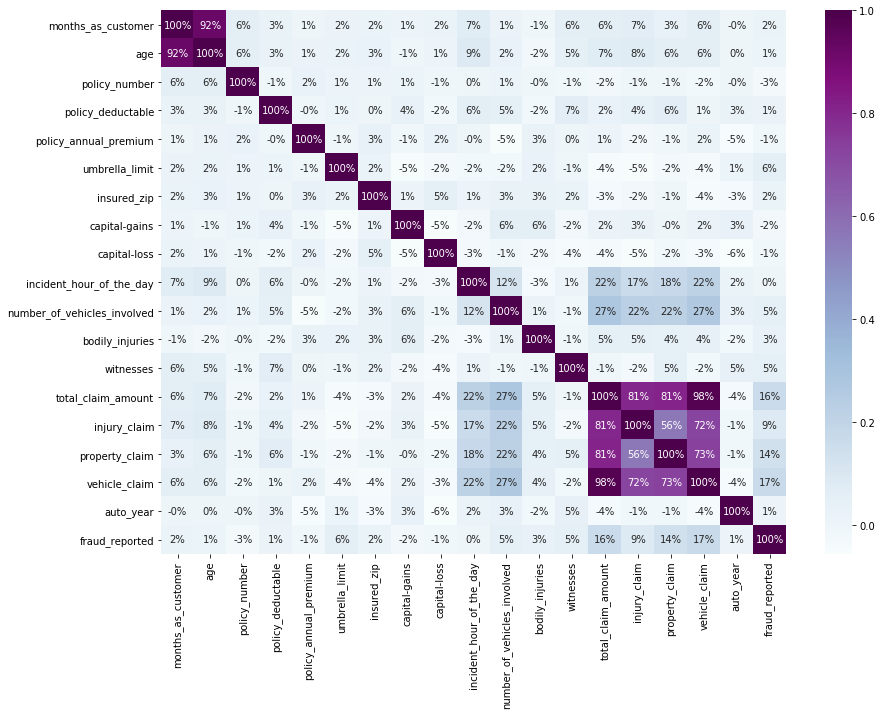

In [22]:
plt.figure(figsize=(14,10))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='BuPu')
plt.show()

Observation:
    
    1-total_claim_amount, injury_claim, property_claim, vehicle_claim columns are highly correlated with eachother.
    
    2-months_as_customer and age is correlated with each other. So as a age of person increases the number of months as
    
      customer also increases.

### Correlation with target column i.e. is fraud_reported.

Text(0.5,1,'Correlation with target Variable')

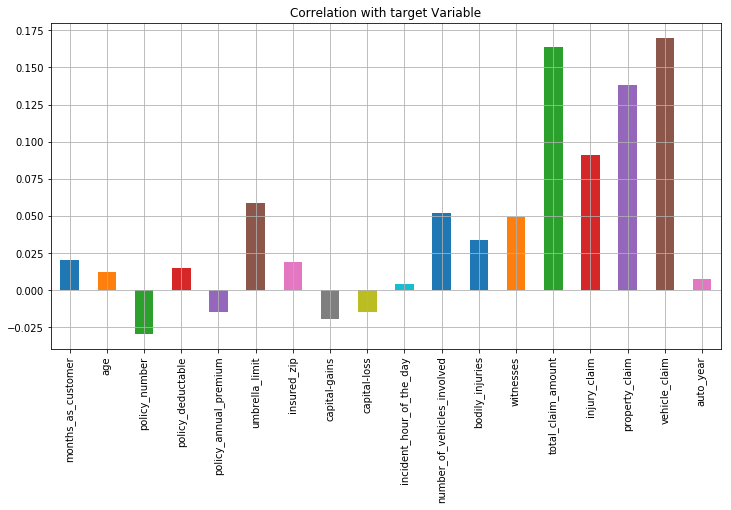

In [23]:
#Correlation with target column
plt.figure(figsize=(12,6))
df.drop('fraud_reported', axis=1).corrwith(df['fraud_reported']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable")

Observation:
    
    Here we see the correlation with target column. Only claiming columns are little bit higher correlated with target
    variable.

# Data Visualization

## Univariate Analysis

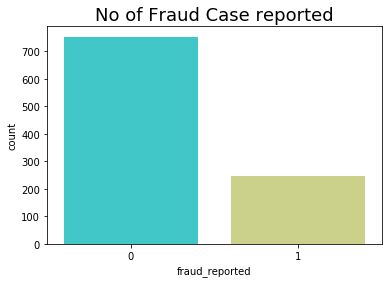

0    753
1    247
Name: fraud_reported, dtype: int64


In [24]:
#Checking the number of Fraud cases.
sns.countplot(x='fraud_reported', data=df, palette='rainbow')
plt.title('No of Fraud Case reported',fontsize=18)
plt.show()

print(df['fraud_reported'].value_counts())

Observation:
    
    Out of 1000 cases only 247 case reported as fraud.

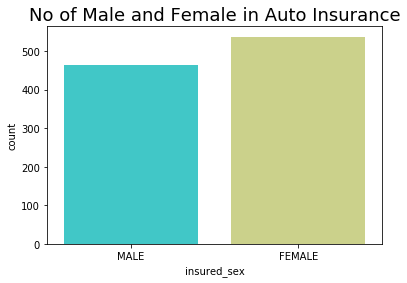

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


In [25]:
#Checking the number of Male and Female who took insurance.
sns.countplot(x='insured_sex', data=df, palette='rainbow')
plt.title('No of Male and Female in Auto Insurance',fontsize=18)
plt.show()

print(df['insured_sex'].value_counts())

Observation:
    
    In Auto Insurance Fraud dataset 537 female had taken insurance and 463 male takes had taken insurance.

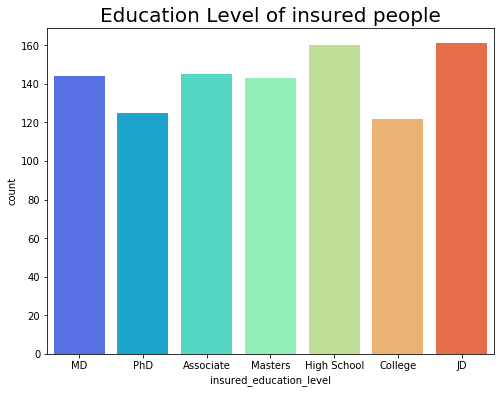

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


In [26]:
#Checking the Education level of insured people.
plt.figure(figsize=(8,6))
sns.countplot(x='insured_education_level', data=df, palette='rainbow')
plt.title('Education Level of insured people',fontsize=20)
plt.show()

print(df['insured_education_level'].value_counts())

Above are the education level of the people who took insurance

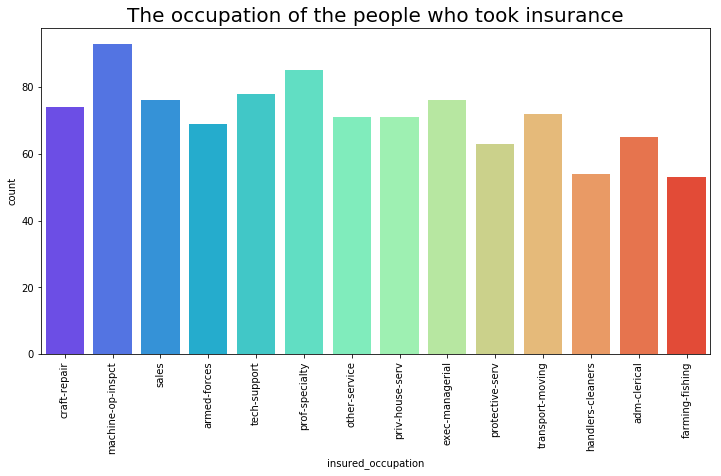

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


In [28]:
#Checking the occupation of the people who took insurance.
plt.figure(figsize=(12,6))
sns.countplot(x='insured_occupation', data=df, palette='rainbow')
plt.title('The occupation of the people who took insurance',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

print(df['insured_occupation'].value_counts())

Above are the occupation of the people who took insurance. Farming fishing occupation is opted by 53 people.

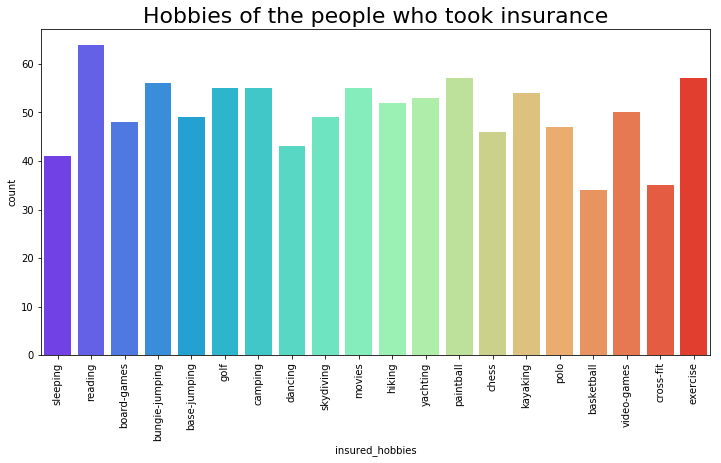

reading           64
exercise          57
paintball         57
bungie-jumping    56
camping           55
movies            55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


In [29]:
#Checking the Hobbies of the people
plt.figure(figsize=(12,6))
sns.countplot(x='insured_hobbies', data=df, palette='rainbow')
plt.title('Hobbies of the people who took insurance',fontsize=22)
plt.xticks(rotation='vertical')
plt.show()

print(df['insured_hobbies'].value_counts())

Observation:
    
    1-Among 1000 people who took insurance 64 people like reading, 57 people like paintball and excercise, and only 34 
      people like basketball.

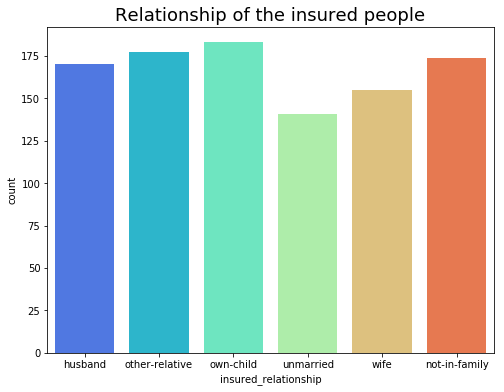

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


In [30]:
#Checking the relationship.
plt.subplots(figsize=(8,6))
sns.countplot(x='insured_relationship', data=df, palette='rainbow')
plt.title('Relationship of the insured people',fontsize=18)
plt.show()

print(df['insured_relationship'].value_counts())

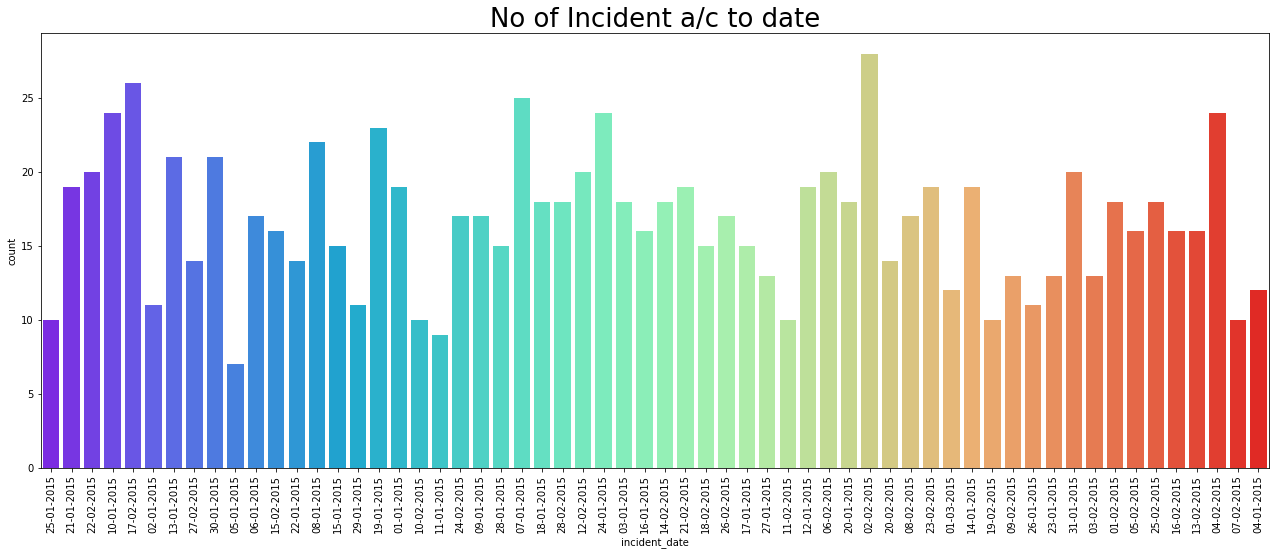

In [31]:
#Checking the incident date.
plt.subplots(figsize=(22,8))
sns.countplot(x='incident_date', data=df, palette='rainbow')
plt.title('No of Incident a/c to date',fontsize=26)
plt.xticks(rotation='vertical')
plt.show()

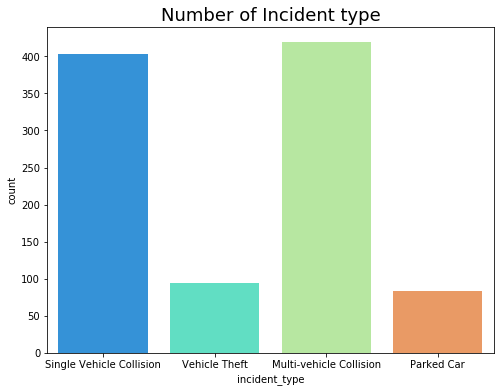

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


In [32]:
#Checking the number Incident type.
plt.subplots(figsize=(8,6))
sns.countplot(x='incident_type', data=df, palette='rainbow')
plt.title('Number of Incident type',fontsize=18)
plt.show()

print(df['incident_type'].value_counts())

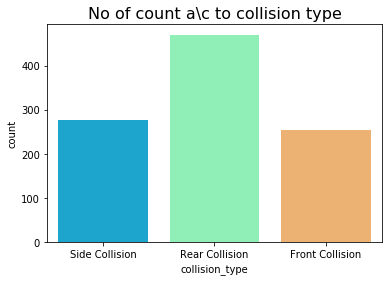

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


In [33]:
#Checking the number of collision type.
sns.countplot(x='collision_type', data=df, palette='rainbow')
plt.title('No of count a\c to collision type',fontsize=16)
plt.show()

print(df['collision_type'].value_counts())

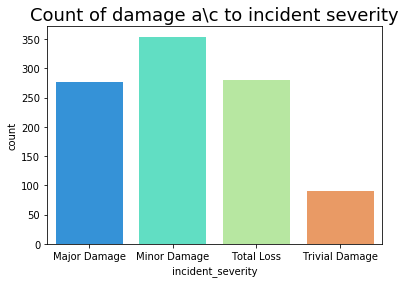

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


In [34]:
#Checking Incident Severity.
sns.countplot(x='incident_severity', data=df, palette='rainbow')
plt.title('Count of damage a\c to incident severity',fontsize=18)
plt.show()

print(df['incident_severity'].value_counts())

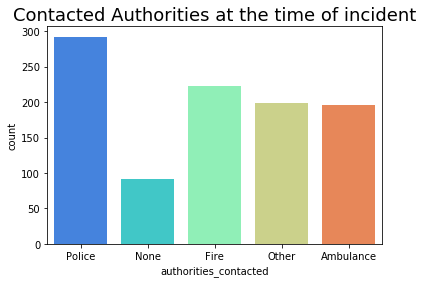

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


In [35]:
#Checking the authorities contacted at the time of incident .
sns.countplot(x='authorities_contacted', data=df, palette='rainbow')
plt.title('Contacted Authorities at the time of incident' ,fontsize=18)
plt.show()

print(df['authorities_contacted'].value_counts())

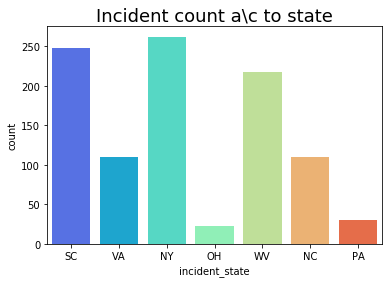

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


In [36]:
#Checking the number of incident a/c to state.
sns.countplot(x='incident_state', data=df, palette='rainbow')
plt.title('Incident count a\c to state',fontsize=18)
plt.show()

print(df['incident_state'].value_counts())

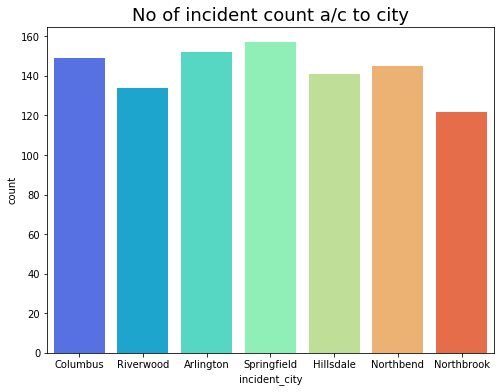

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


In [37]:
#Checking the number of Fraud cases.
plt.figure(figsize=(8,6))
sns.countplot(x='incident_city', data=df, palette='rainbow')
plt.title('No of incident count a/c to city',fontsize=18)
plt.show()

print(df['incident_city'].value_counts())

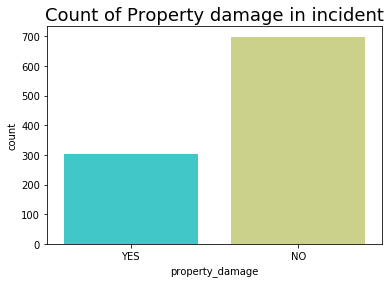

NO     698
YES    302
Name: property_damage, dtype: int64


In [38]:
#Checking the number times property damage in incident.
sns.countplot(x='property_damage', data=df, palette='rainbow')
plt.title('Count of Property damage in incident',fontsize=18)
plt.show()

print(df['property_damage'].value_counts())

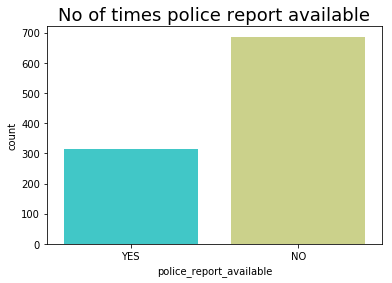

NO     686
YES    314
Name: police_report_available, dtype: int64


In [39]:
#Checking the number of times police report available.
sns.countplot(x='police_report_available', data=df, palette='rainbow')
plt.title('No of times police report available',fontsize=18)
plt.show()

print(df['police_report_available'].value_counts())

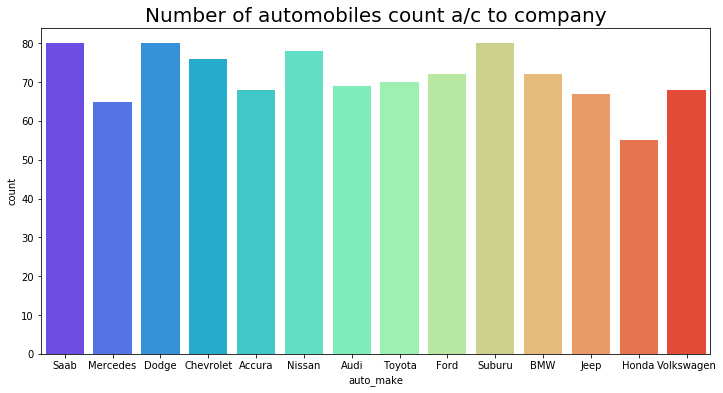

Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


In [40]:
#Checking the number of automobiles company.
plt.figure(figsize=(12,6))
sns.countplot(x='auto_make', data=df, palette='rainbow')
plt.title('Number of automobiles count a/c to company',fontsize=20)
plt.show()

print(df['auto_make'].value_counts())

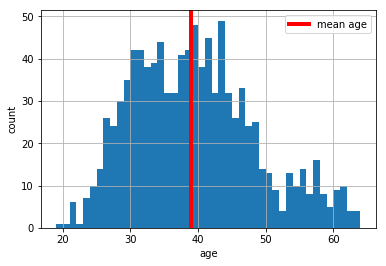

In [41]:
#Checking the mean of age group of people who took insurance

ages = df['age'].hist(bins=max(df['age']-min(df['age'])))
mean_val = np.mean(df['age'])
plt.axvline(mean_val,linewidth=4,  color='red', label='mean age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

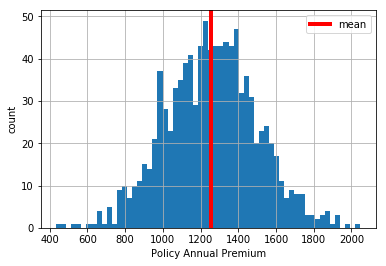

In [42]:
#Checking the mean of policy annual premium

policy_annual_premium = df['policy_annual_premium'].hist(bins=60)
mean_val = np.mean(df['policy_annual_premium'])
plt.axvline(mean_val,linewidth=4,  color='red', label='mean')
plt.xlabel('Policy Annual Premium')
plt.ylabel('count')
plt.legend()
plt.show()

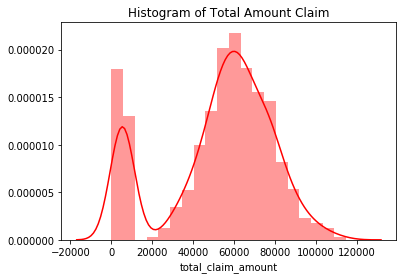

In [43]:
#Histogram of total amount claim
sns.distplot(df['total_claim_amount'],color='r')
plt.title("Histogram of Total Amount Claim")
plt.show()

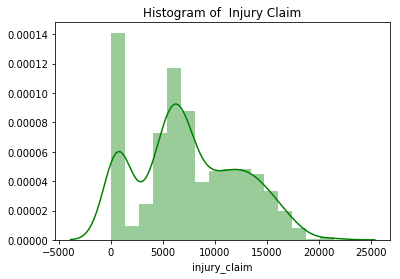

In [44]:
#Histogram of total amount claim
sns.distplot(df['injury_claim'],color='g')
plt.title("Histogram of  Injury Claim")
plt.show()

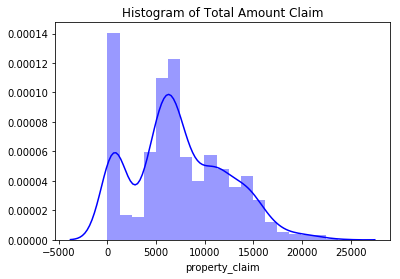

In [45]:
#Histogram of property claim
sns.distplot(df['property_claim'],color='b')
plt.title("Histogram of Total Amount Claim")
plt.show()

From the above two graph it is clearly shown that property claim and injury claim are right skewed.

## Bivariate Analysis

Our feature variable of interest is fraud_reported.

It refers to the fraud cases.

We already change it in integer valued as it contains only two number 0 and 1.

1 stands for Yes Fraud

0 stands for No Fraud

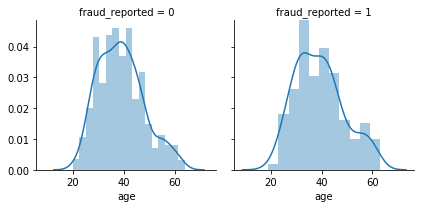

In [46]:
# Exploring Age vs Income via FaceGrid
facet = sns.FacetGrid(df, col='fraud_reported')
facet.map(sns.distplot, "age")
plt.show()

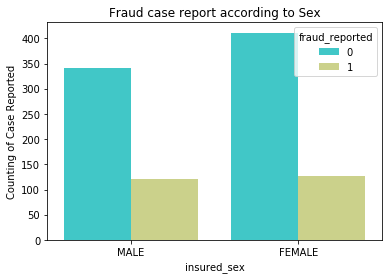

insured_sex  fraud_reported
FEMALE       0                 411
             1                 126
MALE         0                 342
             1                 121
Name: fraud_reported, dtype: int64


In [47]:
#Insured Sex vs Fraud Case reported
sns.countplot(x="insured_sex",hue='fraud_reported',data=df, palette='rainbow')
plt.title("Fraud case report according to Sex")
plt.ylabel('Counting of Case Reported')
plt.show()


print(df.groupby('insured_sex')['fraud_reported'].value_counts())

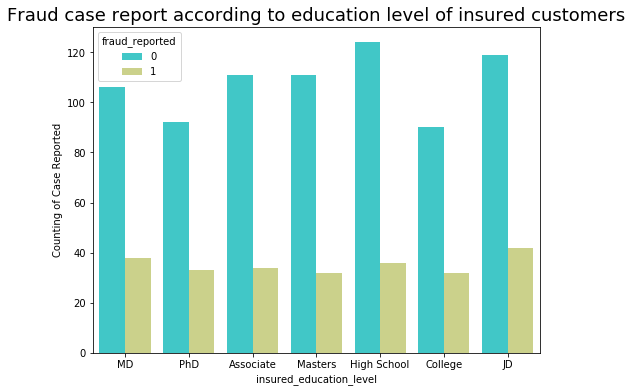

insured_education_level  fraud_reported
Associate                0                 111
                         1                  34
College                  0                  90
                         1                  32
High School              0                 124
                         1                  36
JD                       0                 119
                         1                  42
MD                       0                 106
                         1                  38
Masters                  0                 111
                         1                  32
PhD                      0                  92
                         1                  33
Name: fraud_reported, dtype: int64


In [48]:
#Insured education level vs Fraud Case reported
plt.figure(figsize=(8,6))
sns.countplot(x="insured_education_level",hue='fraud_reported',data=df, palette='rainbow')
plt.title("Fraud case report according to education level of insured customers",fontsize=18)
plt.ylabel('Counting of Case Reported')
plt.show()


print(df.groupby('insured_education_level')['fraud_reported'].value_counts())

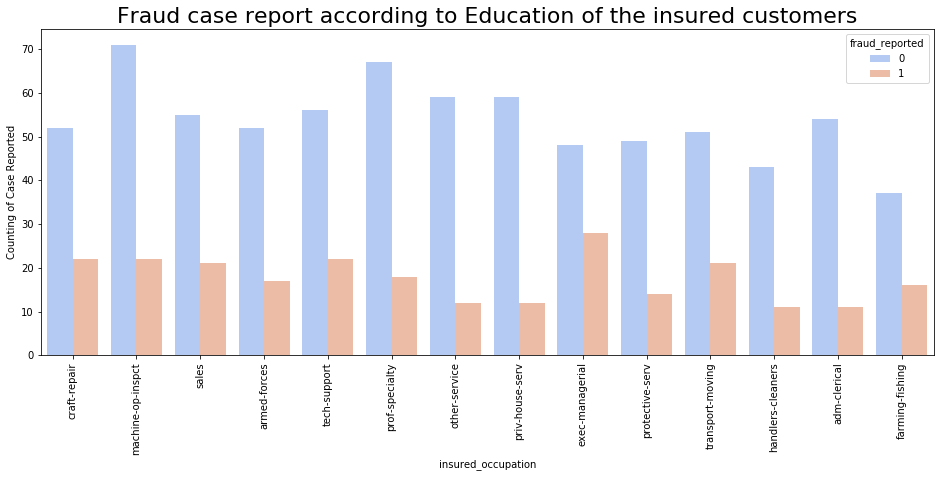

insured_occupation  fraud_reported
adm-clerical        0                 54
                    1                 11
armed-forces        0                 52
                    1                 17
craft-repair        0                 52
                    1                 22
exec-managerial     0                 48
                    1                 28
farming-fishing     0                 37
                    1                 16
handlers-cleaners   0                 43
                    1                 11
machine-op-inspct   0                 71
                    1                 22
other-service       0                 59
                    1                 12
priv-house-serv     0                 59
                    1                 12
prof-specialty      0                 67
                    1                 18
protective-serv     0                 49
                    1                 14
sales               0                 55
                    1 

In [49]:
#Insured Occupation vs Fraud Case reported
plt.figure(figsize=(16,6))
sns.countplot(x="insured_occupation",hue='fraud_reported',data=df, palette='coolwarm')
plt.title("Fraud case report according to Education of the insured customers",fontsize=22)
plt.ylabel('Counting of Case Reported')
plt.xticks(rotation='vertical')
plt.show()


print(df.groupby('insured_occupation')['fraud_reported'].value_counts())

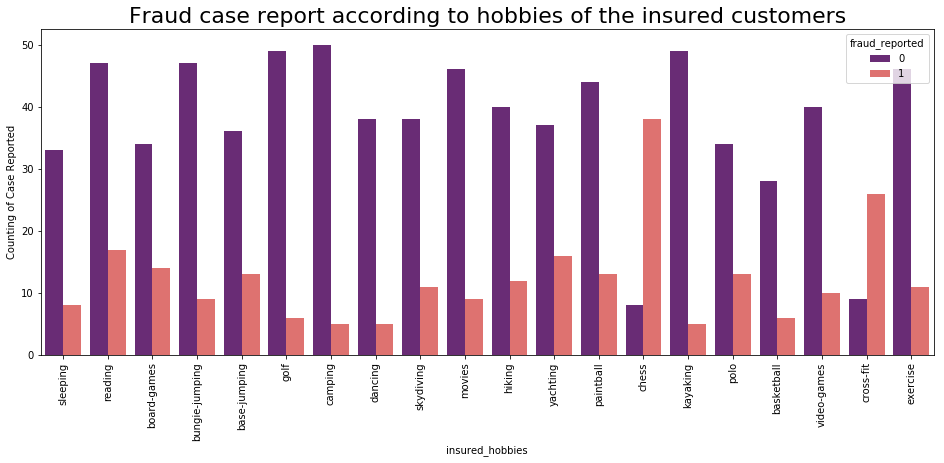

insured_hobbies  fraud_reported
base-jumping     0                 36
                 1                 13
basketball       0                 28
                 1                  6
board-games      0                 34
                 1                 14
bungie-jumping   0                 47
                 1                  9
camping          0                 50
                 1                  5
chess            1                 38
                 0                  8
cross-fit        1                 26
                 0                  9
dancing          0                 38
                 1                  5
exercise         0                 46
                 1                 11
golf             0                 49
                 1                  6
hiking           0                 40
                 1                 12
kayaking         0                 49
                 1                  5
movies           0                 46
                 1

In [50]:
#Insured Hobbies vs Fraud Case reported
plt.figure(figsize=(16,6))
sns.countplot(x="insured_hobbies",hue='fraud_reported',data=df, palette='magma')
plt.title("Fraud case report according to hobbies of the insured customers",fontsize=22)
plt.ylabel('Counting of Case Reported')
plt.xticks(rotation='vertical')
plt.show()


print(df.groupby('insured_hobbies')['fraud_reported'].value_counts())

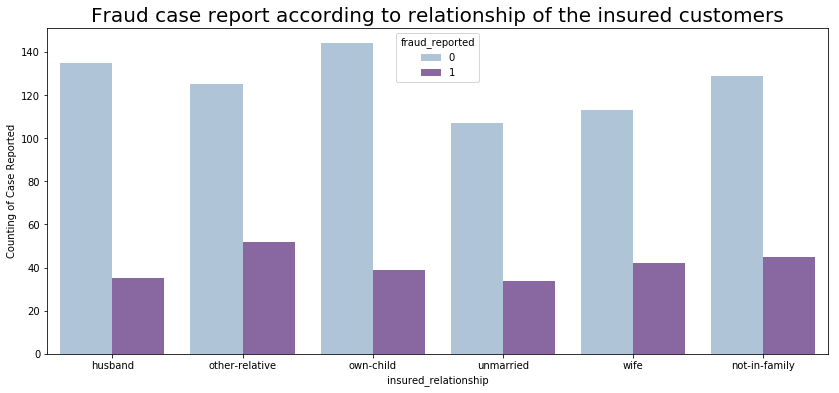

insured_relationship  fraud_reported
husband               0                 135
                      1                  35
not-in-family         0                 129
                      1                  45
other-relative        0                 125
                      1                  52
own-child             0                 144
                      1                  39
unmarried             0                 107
                      1                  34
wife                  0                 113
                      1                  42
Name: fraud_reported, dtype: int64


In [51]:
#Insured relationship vs Fraud Case reported
plt.figure(figsize=(14,6))
sns.countplot(x="insured_relationship",hue='fraud_reported',data=df, palette='BuPu')
plt.title("Fraud case report according to relationship of the insured customers",fontsize=20)
plt.ylabel('Counting of Case Reported')
plt.show()


print(df.groupby('insured_relationship')['fraud_reported'].value_counts())

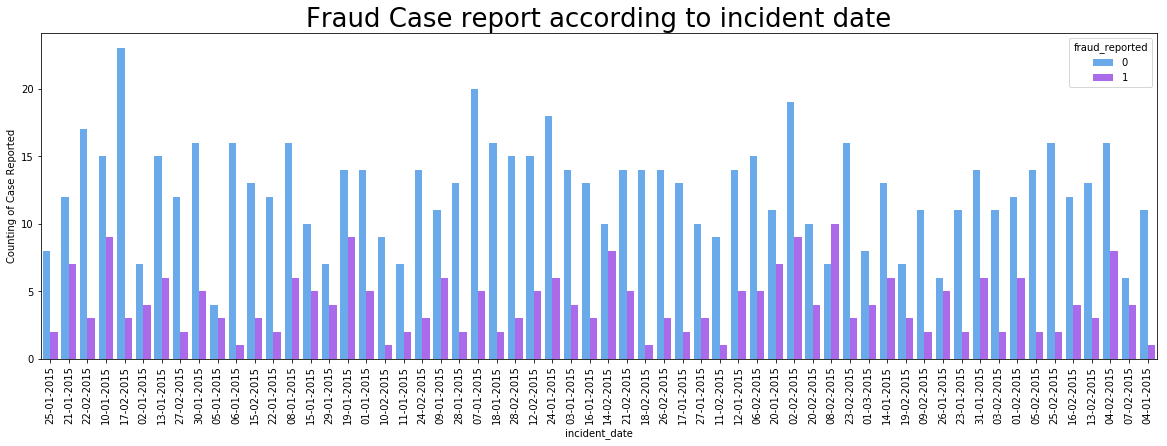

incident_date  fraud_reported
01-01-2015     0                 14
               1                  5
01-02-2015     0                 12
               1                  6
01-03-2015     0                  8
               1                  4
02-01-2015     0                  7
               1                  4
02-02-2015     0                 19
               1                  9
03-01-2015     0                 14
               1                  4
03-02-2015     0                 11
               1                  2
04-01-2015     0                 11
               1                  1
04-02-2015     0                 16
               1                  8
05-01-2015     0                  4
               1                  3
05-02-2015     0                 14
               1                  2
06-01-2015     0                 16
               1                  1
06-02-2015     0                 15
               1                  5
07-01-2015     0                 2

In [52]:
#Incident date vs Fraud Case reported
plt.figure(figsize=(20,6))
sns.countplot(x="incident_date",hue='fraud_reported',data=df, palette='cool')
plt.title("Fraud Case report according to incident date",fontsize=26)
plt.ylabel('Counting of Case Reported')
plt.xticks(rotation='vertical')
plt.show()


print(df.groupby('incident_date')['fraud_reported'].value_counts())

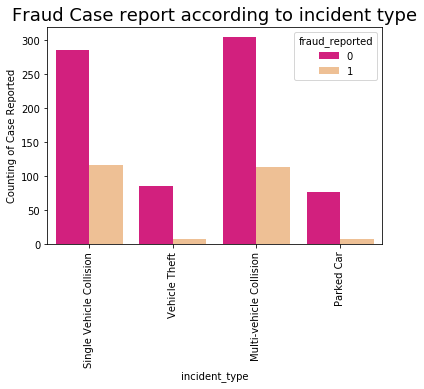

incident_type             fraud_reported
Multi-vehicle Collision   0                 305
                          1                 114
Parked Car                0                  76
                          1                   8
Single Vehicle Collision  0                 286
                          1                 117
Vehicle Theft             0                  86
                          1                   8
Name: fraud_reported, dtype: int64


In [53]:
#Incident type vs Fraud Case reported

sns.countplot(x="incident_type",hue='fraud_reported',data=df,palette='Accent_r')
plt.title("Fraud Case report according to incident type",fontsize=18)
plt.ylabel('Counting of Case Reported')
plt.xticks(rotation='vertical')
plt.show()


print(df.groupby('incident_type')['fraud_reported'].value_counts())

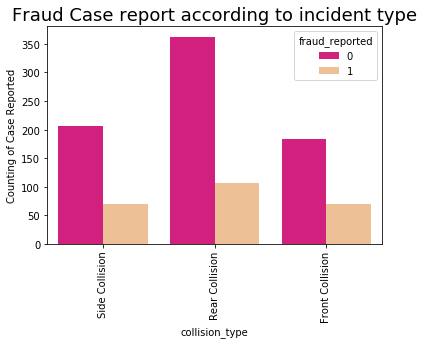

collision_type   fraud_reported
Front Collision  0                 184
                 1                  70
Rear Collision   0                 363
                 1                 107
Side Collision   0                 206
                 1                  70
Name: fraud_reported, dtype: int64


In [54]:
#Incident type vs Fraud Case reported

sns.countplot(x="collision_type",hue='fraud_reported',data=df,palette='Accent_r')
plt.title("Fraud Case report according to incident type",fontsize=18)
plt.ylabel('Counting of Case Reported')
plt.xticks(rotation='vertical')
plt.show()


print(df.groupby('collision_type')['fraud_reported'].value_counts())

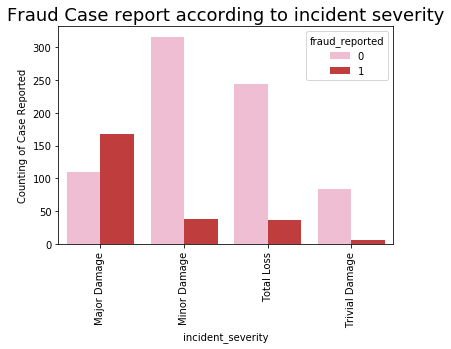

incident_severity  fraud_reported
Major Damage       1                 167
                   0                 109
Minor Damage       0                 316
                   1                  38
Total Loss         0                 244
                   1                  36
Trivial Damage     0                  84
                   1                   6
Name: fraud_reported, dtype: int64


In [55]:
#Incident severity vs Fraud Case reported

sns.countplot(x="incident_severity",hue='fraud_reported',data=df,palette='tab20_r')
plt.title("Fraud Case report according to incident severity",fontsize=18)
plt.ylabel('Counting of Case Reported')
plt.xticks(rotation='vertical')
plt.show()


print(df.groupby('incident_severity')['fraud_reported'].value_counts())

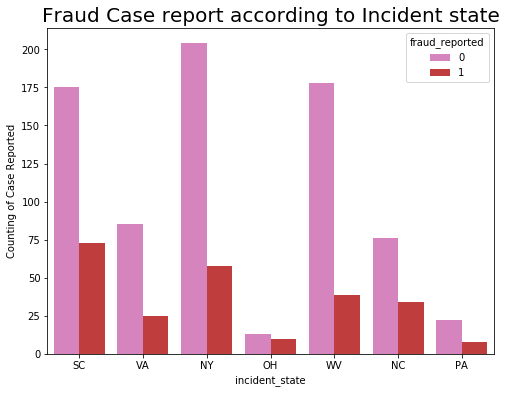

incident_state  fraud_reported
NC              0                  76
                1                  34
NY              0                 204
                1                  58
OH              0                  13
                1                  10
PA              0                  22
                1                   8
SC              0                 175
                1                  73
VA              0                  85
                1                  25
WV              0                 178
                1                  39
Name: fraud_reported, dtype: int64


In [56]:
#Incident state vs Fraud Case reported
plt.subplots(figsize=(8,6))
sns.countplot(x="incident_state",hue='fraud_reported',data=df,palette='tab10_r')
plt.title("Fraud Case report according to Incident state",fontsize=20)
plt.ylabel('Counting of Case Reported')
plt.show()


print(df.groupby('incident_state')['fraud_reported'].value_counts())

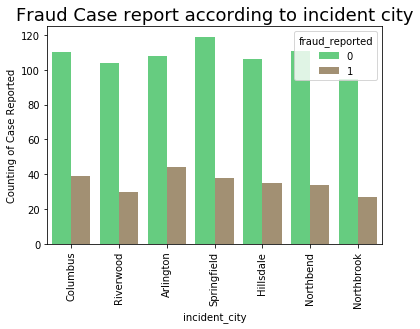

incident_city  fraud_reported
Arlington      0                 108
               1                  44
Columbus       0                 110
               1                  39
Hillsdale      0                 106
               1                  35
Northbend      0                 111
               1                  34
Northbrook     0                  95
               1                  27
Riverwood      0                 104
               1                  30
Springfield    0                 119
               1                  38
Name: fraud_reported, dtype: int64


In [57]:
#Incident city vs Fraud Case reported

sns.countplot(x="incident_city",hue='fraud_reported',data=df,palette='terrain')
plt.title("Fraud Case report according to incident city",fontsize=18)
plt.ylabel('Counting of Case Reported')
plt.xticks(rotation='vertical')
plt.show()


print(df.groupby('incident_city')['fraud_reported'].value_counts())

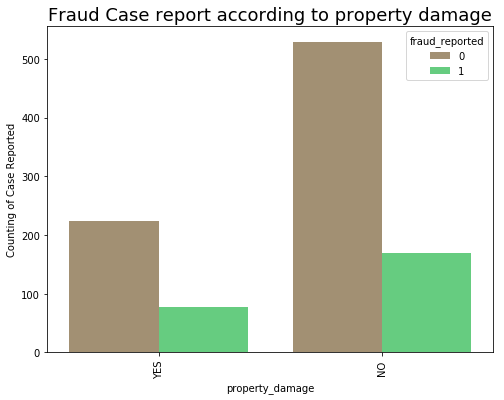

property_damage  fraud_reported
NO               0                 529
                 1                 169
YES              0                 224
                 1                  78
Name: fraud_reported, dtype: int64


In [58]:
#Property damage vs Fraud Case reported
plt.figure(figsize=(8,6))
sns.countplot(x="property_damage",hue='fraud_reported',data=df,palette='terrain_r')
plt.title("Fraud Case report according to property damage",fontsize=18)
plt.ylabel('Counting of Case Reported')
plt.xticks(rotation='vertical')
plt.show()


print(df.groupby('property_damage')['fraud_reported'].value_counts())

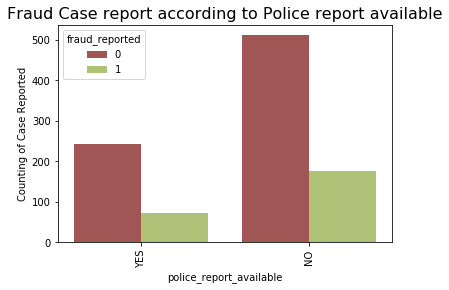

police_report_available  fraud_reported
NO                       0                 511
                         1                 175
YES                      0                 242
                         1                  72
Name: fraud_reported, dtype: int64


In [59]:
#Incident severity vs Fraud Case reported

sns.countplot(x="police_report_available",hue='fraud_reported',data=df,palette='tab20b_r')
plt.title("Fraud Case report according to Police report available",fontsize=16)
plt.ylabel('Counting of Case Reported')
plt.xticks(rotation='vertical')
plt.show()


print(df.groupby('police_report_available')['fraud_reported'].value_counts())

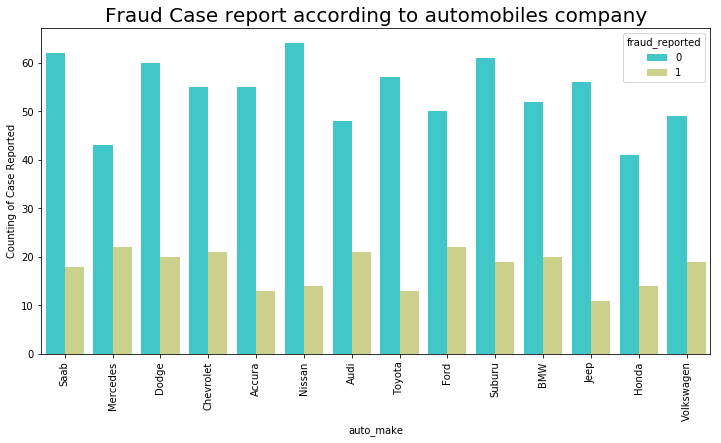

auto_make   fraud_reported
Accura      0                 55
            1                 13
Audi        0                 48
            1                 21
BMW         0                 52
            1                 20
Chevrolet   0                 55
            1                 21
Dodge       0                 60
            1                 20
Ford        0                 50
            1                 22
Honda       0                 41
            1                 14
Jeep        0                 56
            1                 11
Mercedes    0                 43
            1                 22
Nissan      0                 64
            1                 14
Saab        0                 62
            1                 18
Suburu      0                 61
            1                 19
Toyota      0                 57
            1                 13
Volkswagen  0                 49
            1                 19
Name: fraud_reported, dtype: int64


In [60]:
#Automobiles company vs Fraud Case reported
plt.figure(figsize=(12,6))
sns.countplot(x="auto_make",hue='fraud_reported',data=df,palette='rainbow')
plt.title("Fraud Case report according to automobiles company",fontsize=20)
plt.ylabel('Counting of Case Reported')
plt.xticks(rotation='vertical')
plt.show()


print(df.groupby('auto_make')['fraud_reported'].value_counts())

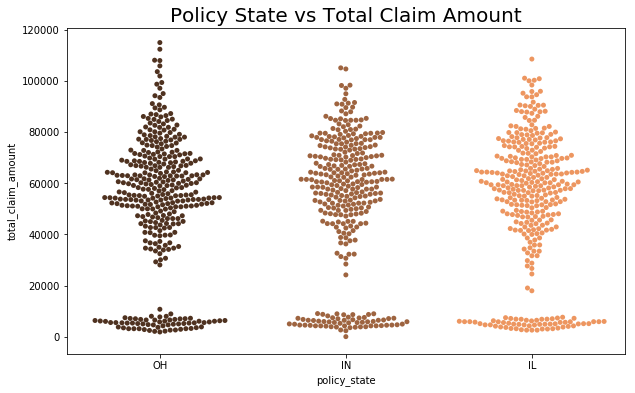

In [61]:
#Policy State vs Claim amount
plt.figure(figsize=(10,6))
sns.swarmplot(df['policy_state'], df['total_claim_amount'], palette = 'copper')
plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

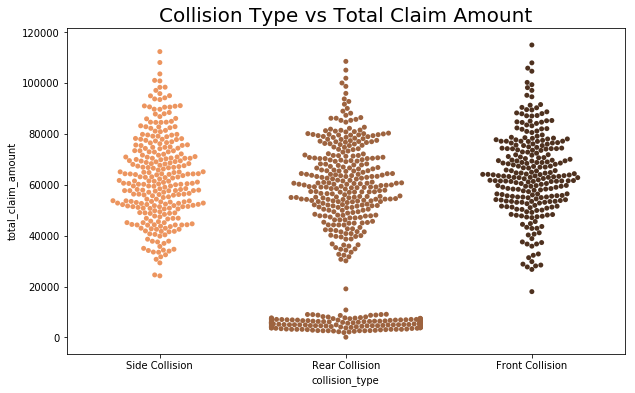

In [62]:
#Collision Type vs Claim amount
plt.figure(figsize=(10,6))
sns.swarmplot(df['collision_type'], df['total_claim_amount'], palette = 'copper_r')
plt.title('Collision Type vs Total Claim Amount', fontsize = 20)
plt.show()

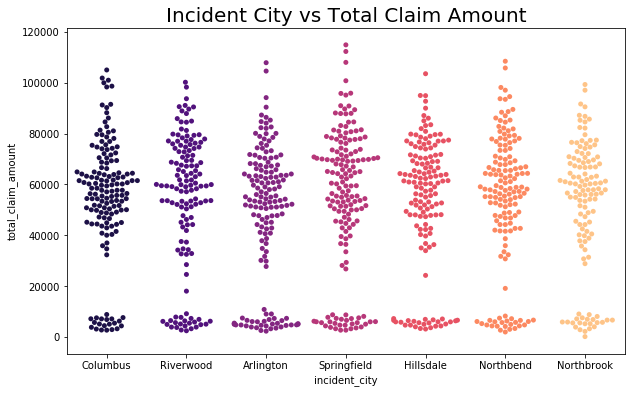

In [63]:
#Incident city vs Claim amount
plt.figure(figsize=(10,6))
sns.swarmplot(df['incident_city'], df['total_claim_amount'], palette = 'magma')
plt.title('Incident City vs Total Claim Amount', fontsize = 20)
plt.show()

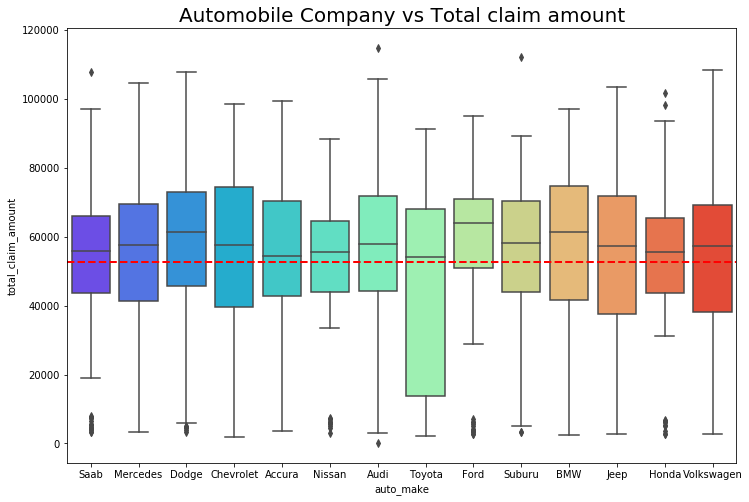

In [64]:
#Total amount claim vs Automobile company
plt.figure(figsize=(12,8))
mean_amount=np.mean(df['total_claim_amount'])
sns.boxplot(y='total_claim_amount',x='auto_make',data=df,palette ="rainbow")
plt.axhline(mean_amount,color='r',linestyle='dashed',linewidth=2)
plt.title("Automobile Company vs Total claim amount",fontsize=20)
plt.show()

Observation:
    
    From the above graph it is clearly shown that mean of total claim amount is nearly same for every automobiles company
    there are some above and low claim amount present in Honda, Ford, Audi, and Saab which may be outliers.

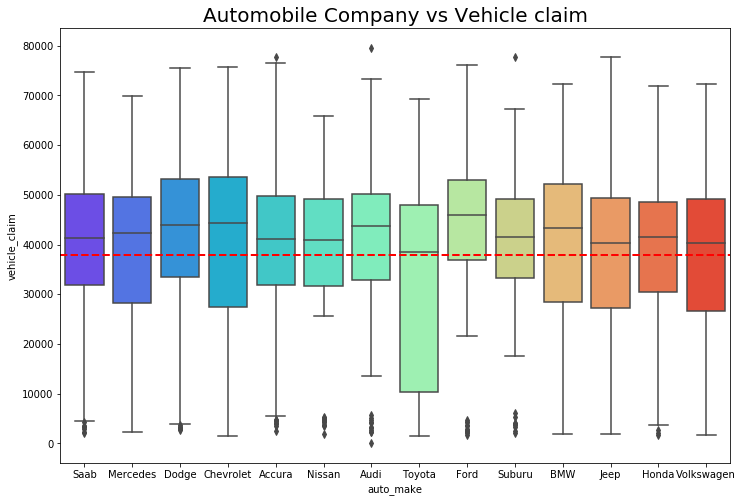

In [65]:
#Vehical claim vs Automobile company
plt.figure(figsize=(12,8))
mean_amount=np.mean(df['vehicle_claim'])
sns.boxplot(y='vehicle_claim',x='auto_make',data=df,palette ="rainbow")
plt.axhline(mean_amount,color='r',linestyle='dashed',linewidth=2)
plt.title("Automobile Company vs Vehicle claim",fontsize=20)
plt.show()

## Multivariate Analysis

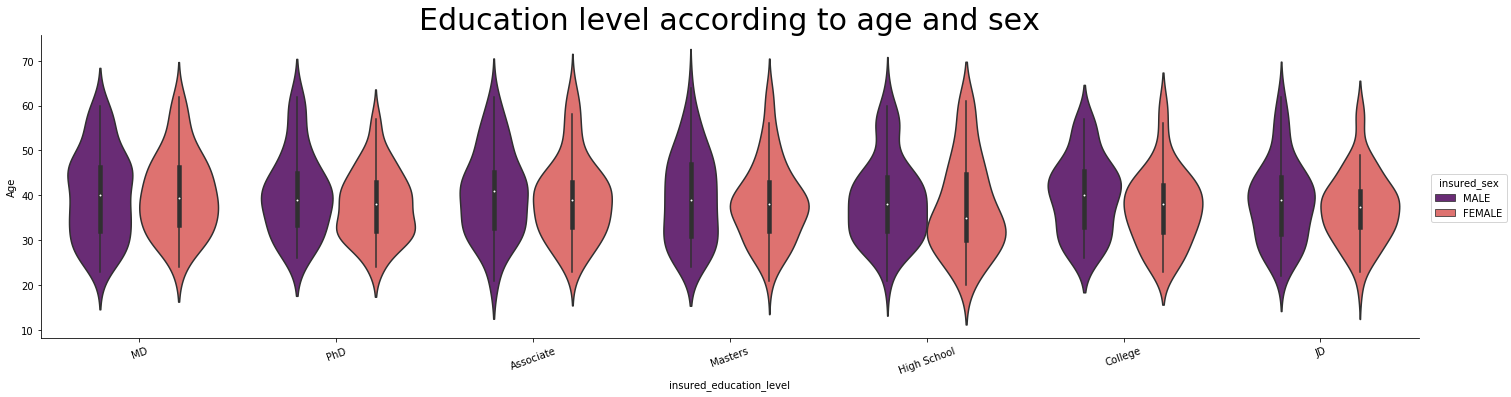

In [66]:
sns.factorplot(x="insured_education_level",y="age",hue='insured_sex',data=df,kind="violin",size = 5,palette = "magma",aspect=4)
plt.title('Education level according to age and sex',fontsize=30)
plt.xticks(rotation=20)
plt.ylabel("Age")
plt.show()

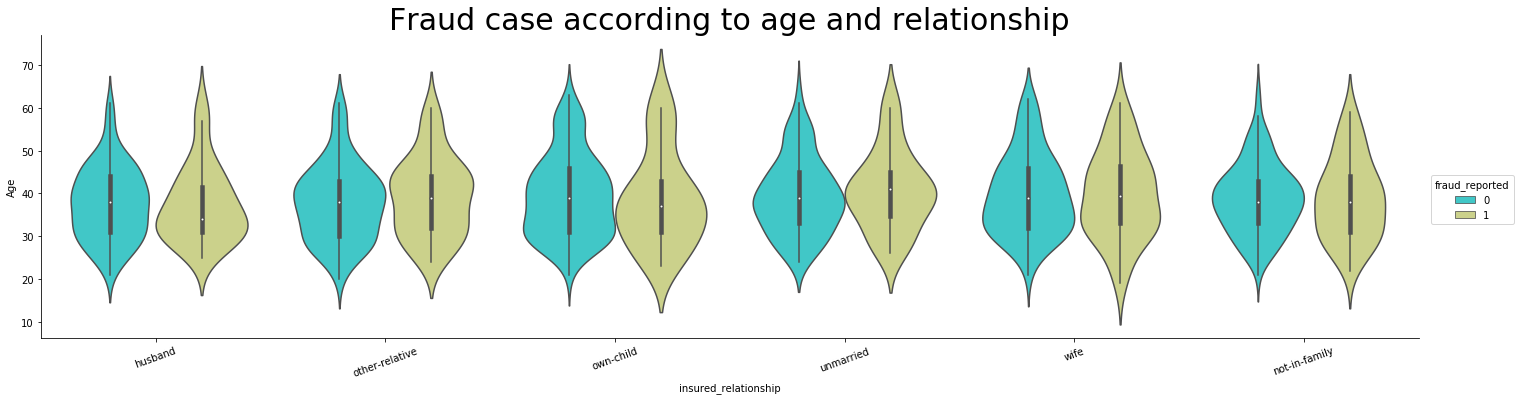

In [67]:
sns.factorplot(x="insured_relationship",y="age",hue='fraud_reported',data=df,kind="violin",size = 5,palette = "rainbow",aspect=4)
plt.title('Fraud case according to age and relationship',fontsize=30)
plt.xticks(rotation=20)
plt.ylabel("Age")
plt.show()

# Checking the skewness

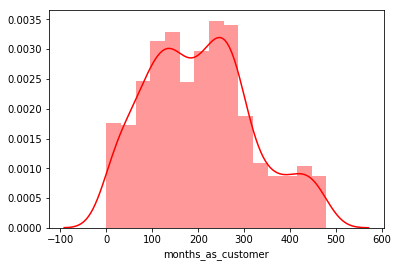

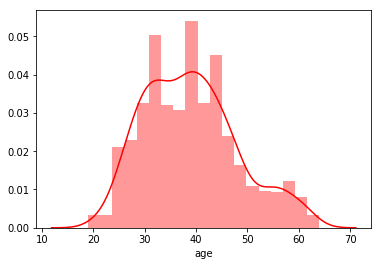

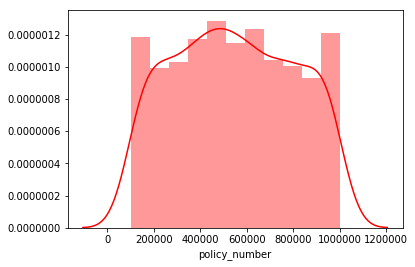

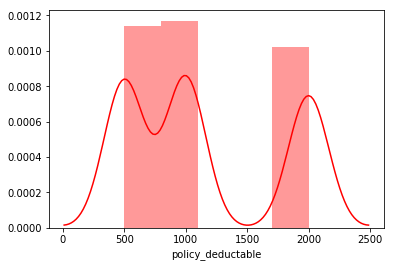

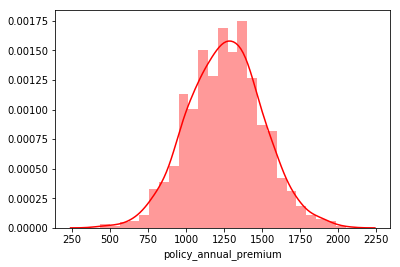

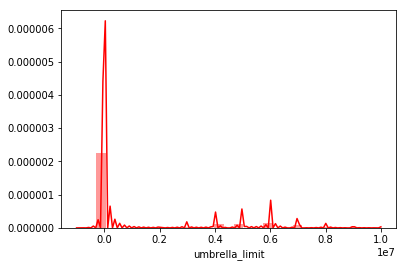

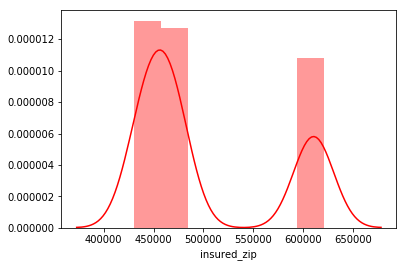

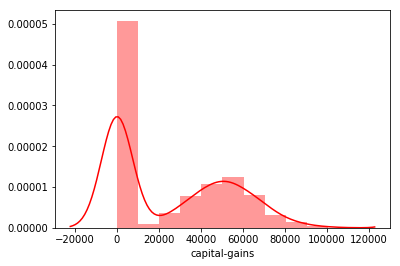

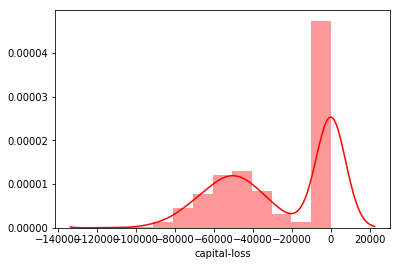

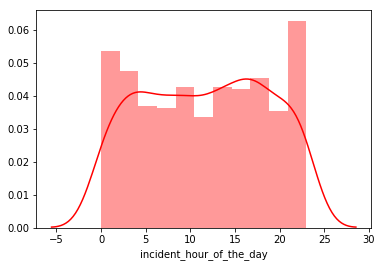

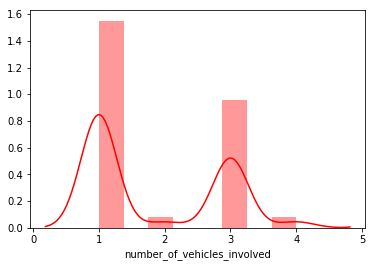

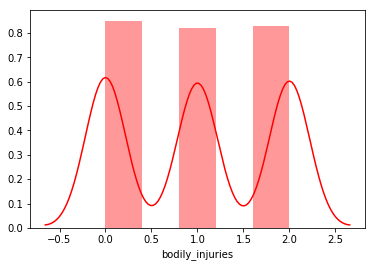

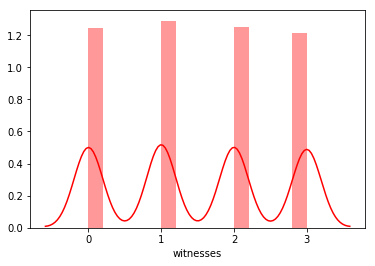

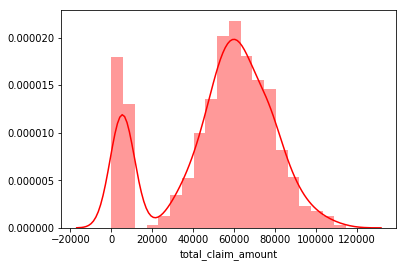

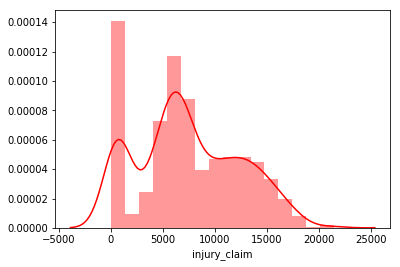

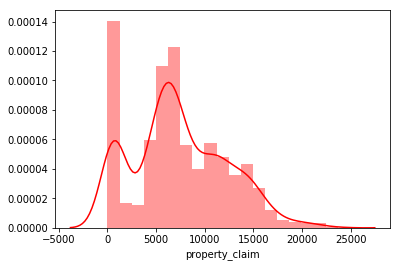

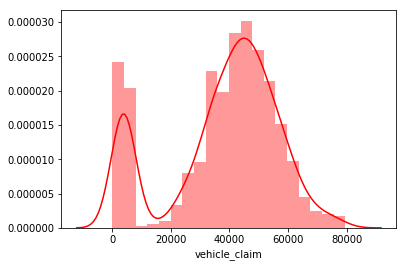

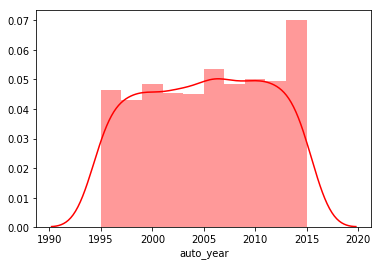

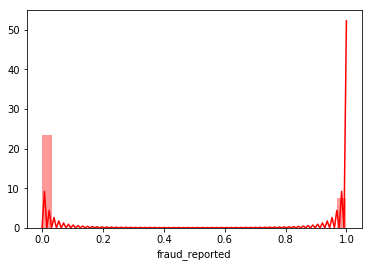

In [68]:
for col in df.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [69]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64

In [70]:
#Removing skewness via log method
df['insured_zip']=np.log(df['insured_zip'])

In [71]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.782405
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64

# Converting the categorical data into numeric variables

In [72]:
# Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [73]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,532,2,1,1,1406.91,1,13.052224,...,2,1,563,258,512,545,10,1,9,1
1,212,23,257,821,1,1,2,1197.22,5,13.056600,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,186,2,0,2,1413.14,5,12.973009,...,3,0,143,337,104,116,4,30,12,0
3,239,22,140,766,0,1,2,1415.74,6,13.318123,...,2,0,451,245,249,521,3,34,19,1
4,212,25,286,181,0,2,1,1583.91,6,13.322371,...,1,0,81,70,36,66,0,31,14,0


# Plotting Outliers

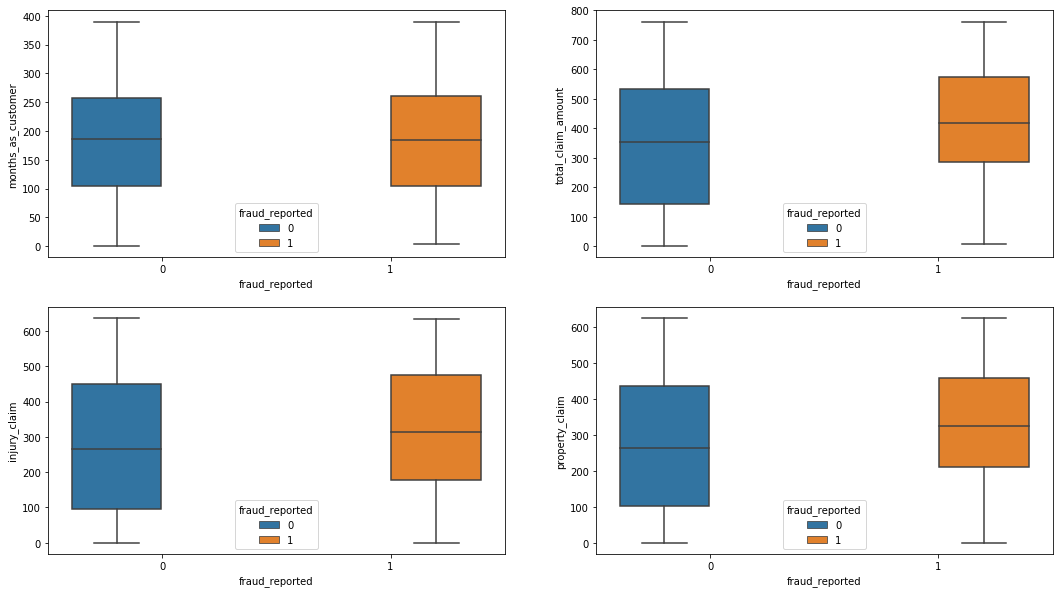

In [74]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (18, 10))
sns.boxplot(ax=ax1, x = 'fraud_reported', y = 'months_as_customer', hue = 'fraud_reported', data = df)
sns.boxplot(ax=ax2, x = 'fraud_reported', y = 'total_claim_amount', hue = 'fraud_reported', data = df)
sns.boxplot(ax=ax3, x = 'fraud_reported', y = 'injury_claim', hue = 'fraud_reported', data = df)
sns.boxplot(ax=ax4, x = 'fraud_reported', y = 'property_claim', hue = 'fraud_reported', data = df)

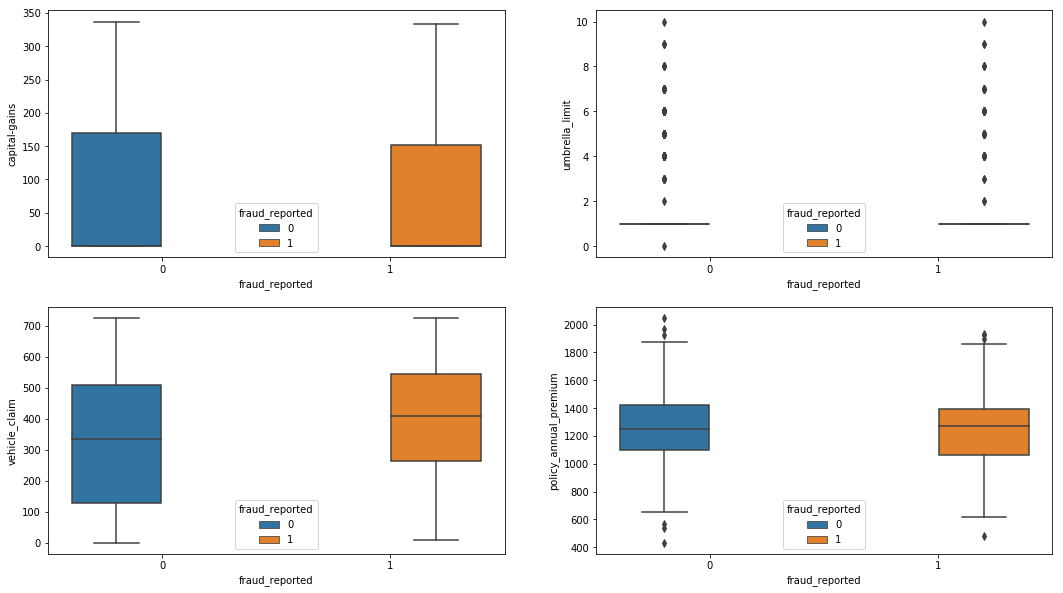

In [75]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (18, 10))
sns.boxplot(ax=ax1, x = 'fraud_reported', y = 'capital-gains', hue = 'fraud_reported', data = df)
sns.boxplot(ax=ax2, x = 'fraud_reported', y = 'umbrella_limit', hue = 'fraud_reported', data = df)
sns.boxplot(ax=ax3, x = 'fraud_reported', y = 'vehicle_claim', hue = 'fraud_reported', data = df)
sns.boxplot(ax=ax4, x = 'fraud_reported', y = 'policy_annual_premium', hue = 'fraud_reported', data = df)

From the above graph it is clearly shown that there are some outliers present in our dataset which needs to be removed.

# Removing Outliers

In [76]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.14895094e+00, 9.90836469e-01, 6.75500153e-02, ...,
        1.64574255e+00, 1.83440399e-01, 1.74601919e+00],
       [2.77600296e-01, 3.34073454e-01, 8.40045062e-01, ...,
        6.57470466e-01, 3.15490877e-01, 1.74601919e+00],
       [6.13781395e-01, 1.08891308e+00, 5.97557827e-01, ...,
        9.59702038e-01, 3.15490877e-01, 5.72731393e-01],
       ...,
       [6.53843494e-01, 5.41610567e-01, 1.39430160e+00, ...,
        2.85700476e-02, 1.51392380e+00, 5.72731393e-01],
       [1.93016186e+00, 2.52328351e+00, 1.73205167e-03, ...,
        1.28637088e+00, 1.18130295e+00, 5.72731393e-01],
       [1.92014633e+00, 2.30436250e+00, 8.14064287e-02, ...,
        6.57470466e-01, 3.15490877e-01, 5.72731393e-01]])

In [77]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 503, 657,
       700, 763, 875, 922, 975], dtype=int64), array([8, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8], dtype=int64))


In [78]:
df_new=df[(z<3).all(axis=1)]

In [79]:
#Checking the shape
print(df.shape,'\t\t',df_new.shape)

(1000, 39) 		 (982, 39)


In [80]:
df=df_new
df.shape

(982, 39)

# Model Training

In [81]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,532,2,1,1,1406.91,1,13.052224,...,2,1,563,258,512,545,10,1,9,1
1,212,23,257,821,1,1,2,1197.22,5,13.056600,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,186,2,0,2,1413.14,5,12.973009,...,3,0,143,337,104,116,4,30,12,0
3,239,22,140,766,0,1,2,1415.74,6,13.318123,...,2,0,451,245,249,521,3,34,19,1
4,212,25,286,181,0,2,1,1583.91,6,13.322371,...,1,0,81,70,36,66,0,31,14,0


In [82]:
#Splitting the data into input and output variable.
x=df.drop(columns=['fraud_reported'],axis=1)
x.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,299,29,480,532,2,1,1,1406.91,1,13.052224,...,1,2,1,563,258,512,545,10,1,9
1,212,23,257,821,1,1,2,1197.22,5,13.056600,...,0,0,0,44,46,45,38,8,12,12
2,123,10,672,186,2,0,2,1413.14,5,12.973009,...,2,3,0,143,337,104,116,4,30,12
3,239,22,140,766,0,1,2,1415.74,6,13.318123,...,1,2,0,451,245,249,521,3,34,19
4,212,25,286,181,0,2,1,1583.91,6,13.322371,...,0,1,0,81,70,36,66,0,31,14


In [83]:
y=df['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [84]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(982, 38) 		 (982,)


In [85]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [86]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [87]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(785, 38) 		 (197, 38)


In [88]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(785,) 	 (197,)


In [89]:
#Importing all the model Library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [90]:
# All Algorithm by using for loop

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),
       RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) is:
0.7817258883248731
[[138  11]
 [ 32  16]]
             precision    recall  f1-score   support

          0       0.81      0.93      0.87       149
          1       0.59      0.33      0.43        48

avg / total       0.76      0.78      0.76       197

*****************************************************************************************


Accuracy score of GaussianNB(priors=None) is:
0.751269035532995
[[121  28]
 [ 21  27]]
             precision    recall  f1-score   support

          0       0.85      0.81      0.83       149
          1       0.49      0.56      0.52        48

avg / total       0.76      0.75      0.76       197

**************************************************************

In [91]:
#Cross Validate the models

models=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),
       RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in models:
    score=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Score: [0.74242424 0.75757576 0.8030303  0.74242424 0.77272727 0.81818182
 0.78787879 0.69230769 0.75384615 0.73846154 0.76923077 0.83076923
 0.8        0.75384615 0.78461538]
Mean Score: 0.7698212898212898
Standard deviation: 0.03442292691350069
************************************************************************************************


Model: GaussianNB(priors=None)
Score: [0.77272727 0.77272727 0.8030303  0.66666667 0.77272727 0.66666667
 0.71212121 0.72307692 0.72307692 0.69230769 0.72307692 0.84615385
 0.76923077 0.72307692 0.73846154]
Mean Score: 0.7403418803418804
Standard deviation: 0.047793049360333247
************************************************************************************************


Mode

## Using GridSearchCV to find out best parameter

In [92]:
#Using GridSearchCV to find out the best parameter in LogisticRegression

parameters={'C':[1,10],'random_state':range(42,56)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'random_state': 42}


In [93]:
#Using GridSearchCV to find out the best parameter in DecisionTreeClassifier

parameters={'criterion':['gini','entropy'],'random_state':range(42,60)}
dtc=DecisionTreeClassifier()

clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'gini', 'random_state': 47}


In [94]:
#Using GridSearchCV to find out the best parameter in GradientBoostingClassifier

parameters={'criterion':['friedman_mse','mse','mae'],'n_estimators':[100,200,300]}
gbc=GradientBoostingClassifier()

clf=GridSearchCV(gbc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 200}


### Applying the result in models

In [95]:
LR=LogisticRegression(C=10,random_state=42)
DTC=DecisionTreeClassifier(criterion='gini',random_state=47)
GBC=GradientBoostingClassifier(criterion='friedman_mse',random_state=42,learning_rate=0.1,n_estimators=250,
                                max_depth=4)
BC=BaggingClassifier(n_estimators=250)

In [96]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DTC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('BaggingClassifier',BC))

****************** LogisticRegression *****************************


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Accuracy Score: 0.7817258883248731


Cross Val Score: 0.7698212898212898


ROC_AUC_Score: 0.6297539149888143


[[138  11]
 [ 32  16]]


Classification_report 
              precision    recall  f1-score   support

          0       0.81      0.93      0.87       149
          1       0.59      0.33      0.43        48

avg / total       0.76      0.78      0.76       197



AxesSubplot(0.125,0.808774;0.775x0.0712264)



****************** DecisionTreeClassifier *****************************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, m

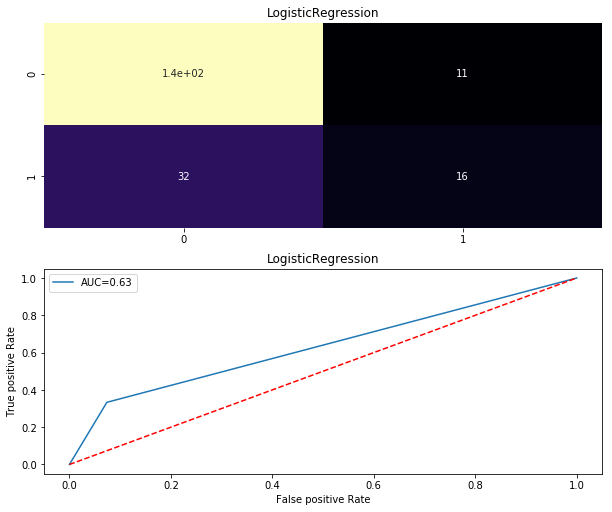

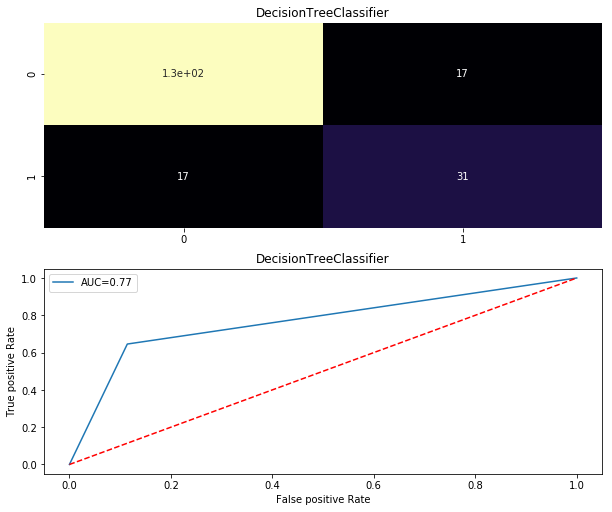

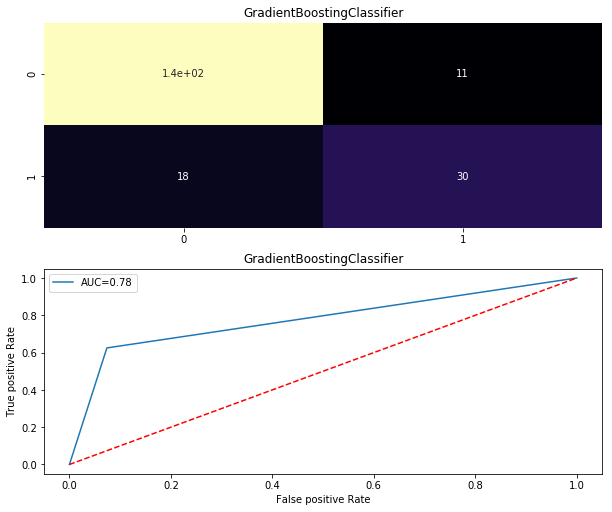

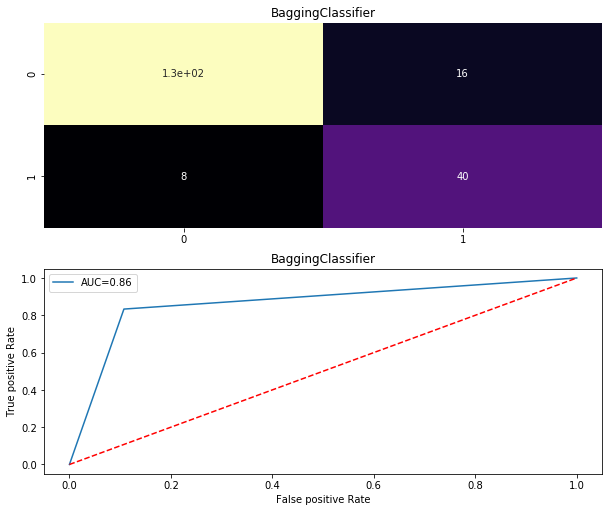

In [97]:
Model=[]
score=[]
CVS=[]
ROC_Score=[]

for name,model in models:
    print('******************',name,'*****************************')
    print('\n')
    Model.append(name)
   
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #Accuracy Score
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    
    #Cross Val Score
    cross_val=cross_val_score(model,x,y,cv=15,scoring='accuracy').mean()
    print('Cross Val Score:',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #ROC_AUC_Score
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_Score:',roc_auc)
    ROC_Score.append(roc_auc*100)
    print('\n')
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print('Classification_report \n',classification_report(y_test,pred))
    print('\n')
    
    #ConfusionMatrix via Heatmap
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True,cbar=False,cmap='magma'))
    plt.subplot(912)
    plt.title(name)
    
    #ROC Curve
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='Lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False positive Rate')
    print('\n\n')

In [98]:
#Storing the result in a dataframe
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Val_Score':CVS,'ROC_AUC_Score':ROC_Score})
result

,Model,Accuracy_Score,Cross_Val_Score,ROC_AUC_Score
0,LogisticRegression,78.172589,76.982129,62.975391
1,DecisionTreeClassifier,82.741117,79.743590,76.586969
2,GradientBoostingClassifier,85.279188,81.078477,77.558725
3,BaggingClassifier,87.817259,83.409479,86.297539


### I choose BaggingClassifier as my final model

In [99]:
#Saving this model
from sklearn.externals import joblib

#Save the model as a pickle in a file
joblib.dump(BC,'Auto_Insurance_Fraud_BC.csv')

['Auto_Insurance_Fraud_BC.csv']